In [1]:
#Importar pacotes
import pandas as pd
import numpy as np
import csv as csv

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier

#Shuffle the datasets
from sklearn.utils import shuffle

#Learning curve
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.utils import shuffle
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

from sklearn.decomposition import PCA


import math
import time
%matplotlib inline
import seaborn as sns
from sklearn.metrics import accuracy_score, f1_score , precision_score, recall_score, roc_auc_score
#metrics.roc_auc_score(y_true, y_score[, …])

sns.set(style="ticks")
plt.rcParams['figure.figsize'] = (16.0, 10.0)
plt.style.use('seaborn-colorblind')
%matplotlib inline
cpu = 10


In [2]:
#USAR ESSE
#dataset completo
rd = pd.read_csv("rd-MG-SP-2018-2016.csv")

/home/wilson_tayar/anaconda3/envs/tera-fev2018/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (40,41,42,43,44) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
#OU ESSE
rd = pd.read_csv('rd-MG-SP-2018-2016.csv',skiprows=lambda idx: np.random.random() > .005 if idx != 0 else False)

In [28]:
rd.iloc[811122]

AttributeError: 'NoneType' object has no attribute 'iloc'

In [ ]:
#sp = pd.read_csv("sp-MG-SP-2018-2016.csv")

In [ ]:
#rd.shape

In [ ]:
#rd.isnull().sum()

In [ ]:
#rd.T.head(60)

# drop columns / features

In [3]:
#rd = rd.drop(['UF_ZI', 'ANO_CMPT', 'MES_CMPT', 'CEP','NASC','DT_INTER','DT_SAIDA','MUNIC_MOV', 
# 'UTI_INT_TO', 'DIAR_ACOM','VAL_SH', 'VAL_SP', 'VAL_UTI','VAL_TOT','UTI_MES_TOT','PROC_REA',
# 'COD_IDADE','DIAS_PERM', 'NACIONAL','NUM_FILHOS', 'CNES', 'INFEHOSP', 'RACA_COR', 'ETNIA', 
# 'DIAGSEC1','DIAGSEC2', 'DIAGSEC3', 'DIAGSEC4', 'DIAGSEC5', 'DIAGSEC6', 'DIAGSEC7','DIAGSEC8', 'DIAGSEC9',
#TPDISEC7','TPDISEC8','TPDISEC9'],axis=1)

X_data = rd.drop(['UF_ZI','PROC_REA', 'ANO_CMPT', 'MES_CMPT', 'CEP', 'MUNIC_RES','NASC','UTI_MES_TO', 'UTI_INT_TO', 'DIAR_ACOM', 'QT_DIARIAS','VAL_SH', 'VAL_SP', 'VAL_TOT', 'VAL_UTI','DT_INTER', 'DT_SAIDA','MUNIC_MOV', 'COD_IDADE','DIAS_PERM', 'MORTE', 'NACIONAL','NUM_FILHOS','CNAER', 'CNES', 'INFEHOSP', 'RACA_COR', 'ETNIA', 'DIAGSEC1','DIAGSEC2', 'DIAGSEC3', 'DIAGSEC4', 'DIAGSEC5', 'DIAGSEC6', 'DIAGSEC7','DIAGSEC8', 'DIAGSEC9','TPDISEC7','TPDISEC8','TPDISEC9'],axis=1)


In [ ]:
X_data.dtypes

# dummy variables

In [4]:
X_data['IDADE_2'] = X_data['IDADE']**2

In [5]:
X_data["IND_UTI"] = rd["UTI_MES_TO"] > 0

In [6]:
X_data["PROC_SOLIC"] = X_data["PROC_SOLIC"].apply(lambda row :  str(row)[:3])
#rd["PROC_REA"] = rd["PROC_REA"].apply(lambda row :  str(row)[:4])

In [7]:
X_data["DIAG_PRINC"] = X_data["DIAG_PRINC"].apply(lambda row: row[0])
#rd["DIAG_PRINC"].unique()

In [8]:
cols_dummy = ['SEXO','PROC_SOLIC','DIAG_PRINC', 'IND_VDRL','CAR_INT', 'INSTRU', 'CONTRACEP1', 'CONTRACEP2', 'GESTRISCO','TPDISEC1', 'TPDISEC2', 'TPDISEC3', 'TPDISEC4','TPDISEC5', 'TPDISEC6']


X_data = pd.get_dummies(X_data,dummy_na=True,columns=cols_dummy,drop_first=True)

Y_data = rd['DIAS_PERM']

#dummycols = ['SEXO','PROC_SOLIC','PROC_REA','DIAG_PRINC', 'IND_VDRL','CAR_INT', 'INSTRU', 'CONTRACEP1', 'CONTRACEP2', 'GESTRISCO','TPDISEC1', 'TPDISEC2', 'TPDISEC3', 'TPDISEC4','TPDISEC5', 'TPDISEC6']
#rd = pd.get_dummies(rd,dummy_na=True,columns=dummycols,drop_first=True)
#rd.shape

In [9]:
X_data = X_data.fillna(0,axis=1)

# Train Test Split

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_middle, Y_train, Y_middle = train_test_split(X_data,Y_data,test_size=0.3,random_state=42)
X_cv, X_test, Y_cv, Y_test = train_test_split(X_middle,Y_middle,test_size=(1/3),random_state=42)

# Liberando memoria


In [11]:
rd = None
X_data = None

# linear regression

In [12]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model  import Lasso

In [ ]:
#target = rd["QT_DIARIAS"]
#data = rd.drop('QT_DIARIAS',  axis=1)

In [ ]:
#datatrain, datatest, targettrain, targettest =  train_test_split(data, target, test_size = 0.3,  random_state=144)

In [13]:
lrmodel =  linear_model.LinearRegression()
lrmodel.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [ ]:
#targetpred =  lrmodel.predict(datatest)

In [14]:
#print ("R^2 train:", lrmodel.score(datatrain, targettrain))
#print ("R^2 test:", lrmodel.score(datatest, targettest))
#print ("R^2 pred:", lrmodel.score(datatest, targetpred))

y_train_pred = lrmodel.predict(X_train)
y_test_pred = lrmodel.predict(X_test)
Y_train = np.reshape(Y_train,(len(Y_train),))
Y_test = np.reshape(Y_test,(len(Y_test),))

from sklearn.metrics import r2_score,mean_squared_error,median_absolute_error

print(str(r2_score(Y_train,y_train_pred)),' é o R2 do training set')
print(str(r2_score(Y_test,y_test_pred)), ' é o R2 do test set')

print(str(mean_squared_error(Y_train,y_train_pred)),' é o MSE do training set')
print(str(mean_squared_error(Y_test,y_test_pred)), ' é o MSE do test set')

print(str(median_absolute_error(Y_train,y_train_pred)),' é o MAE do training set')
print(str(median_absolute_error(Y_test,y_test_pred)), ' é o MAE do test set')

/home/wilson_tayar/anaconda3/envs/tera-fev2018/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


0.30022431869  é o R2 do training set
0.296461761513  é o R2 do test set
48.1045549567  é o MSE do training set
48.4269576022  é o MSE do test set
2.13800116819  é o MAE do training set
2.13102300954  é o MAE do test set


In [15]:
from sklearn.externals import joblib
joblib.dump(lrmodel, 'lrmodel.pkl')
#lrmodel = joblib.load('lrmodel.pkl')

['lrmodel.pkl']

# lasso (feature importance)

In [16]:
from tqdm import tqdm

lasso_selection = pd.DataFrame(X_train.columns)
#alfa_ranges = [10,1,0.1,0.05,0.01,0.005,0.001,0.0005]
alfa_ranges = [0.001,0.01,0.1,1,10]
for alfa in tqdm(alfa_ranges):
    model = linear_model.Lasso(alpha=alfa)
    model.fit(X_train,Y_train)
    lasso_selection= np.hstack((lasso_selection,np.reshape(model.coef_,(len(lasso_selection),1))))

100%|██████████| 5/5 [11:15<00:00, 135.12s/it]


In [17]:
lasso_selection = pd.DataFrame(lasso_selection)
print(lasso_selection)

                   0            1            2            3            4  \
0              IDADE     0.050765    0.0465378    0.0372035            0   
1            IDADE_2 -0.000325075 -0.000292746 -0.000193282  0.000397635   
2            IND_UTI      7.50761      7.50293      6.52274            0   
3           SEXO_3.0    -0.415183    -0.431119    -0.362293           -0   
4           SEXO_nan            0            0            0            0   
5     PROC_SOLIC_209            0            0            0            0   
6     PROC_SOLIC_211     -7.52486           -0           -0           -0   
7     PROC_SOLIC_301     -1.41554     -1.54366           -0           -0   
8     PROC_SOLIC_303      3.74688      3.49202      3.40737     0.674034   
9     PROC_SOLIC_304      2.53466      1.98178            0            0   
10    PROC_SOLIC_305      3.85339      2.68098            0            0   
11    PROC_SOLIC_308     0.395656            0            0            0   
12    PROC_S

In [18]:
lasso_selection_data = lasso_selection.drop(0,axis=1)
weights = pd.DataFrame(np.arange(len(alfa_ranges))+1)

lasso_selection_wa = np.dot(lasso_selection_data,weights)
lasso_selection_wa = lasso_selection_wa
lasso_selection_wa = np.hstack((pd.DataFrame(X_train.columns),lasso_selection_wa))
lasso_selection_wa = pd.DataFrame(lasso_selection_wa,columns=['feature','importance'])
print(lasso_selection_wa.sort_values('importance'))

            feature importance
6    PROC_SOLIC_211   -7.52486
41     DIAG_PRINC_H   -6.98742
48     DIAG_PRINC_O   -6.38619
13   PROC_SOLIC_401   -5.77924
56     DIAG_PRINC_Z   -5.12956
26   PROC_SOLIC_414    -4.8694
44     DIAG_PRINC_K    -4.8642
7    PROC_SOLIC_301   -4.50286
47     DIAG_PRINC_N   -4.07641
38     DIAG_PRINC_E   -3.65939
17   PROC_SOLIC_405   -3.57619
42     DIAG_PRINC_I   -3.36932
18   PROC_SOLIC_406   -3.01686
43     DIAG_PRINC_J   -2.66532
3          SEXO_3.0    -2.3643
37     DIAG_PRINC_D   -2.33516
28   PROC_SOLIC_416    -2.1319
30   PROC_SOLIC_503   -2.09679
21   PROC_SOLIC_409   -1.93579
15   PROC_SOLIC_403   -1.89848
60      CAR_INT_2.0   -1.58697
16   PROC_SOLIC_404   -1.53448
51     DIAG_PRINC_R   -1.38439
52     DIAG_PRINC_S  -0.957491
36     DIAG_PRINC_C  -0.917969
64      CAR_INT_6.0  -0.873072
46     DIAG_PRINC_M  -0.755283
78   CONTRACEP1_8.0  -0.605461
22   PROC_SOLIC_410  -0.569517
68       INSTRU_3.0  -0.337671
..              ...        ...
20   PRO

In [19]:
#joblib.dump(lrmodel, 'lrmodel.pkl')
#lrmodel = joblib.load('lrmodel.pkl')
lasso_selection_wa.to_csv('lasso_selection.csv')

In [ ]:
#lassodata = data.loc[0:,['IDADE','PROC_REA_5060','TPDISEC3_1.0','TPDISEC2_2.0','DIAG_PRINC_T','PROC_SOLIC_3100',         
#'TPDISEC2_1.0','PROC_REA_3100','PROC_REA_3041','PROC_SOLIC_3050','PROC_REA_4110','PROC_REA_3050','PROC_REA_4120', 
#'TPDISEC1_1.0','PROC_SOLIC_3041','PROC_SOLIC_3030','PROC_REA_3030','PROC_SOLIC_3031','PROC_REA_3031',
#'DIAG_PRINC_G','DIAG_PRINC_F']]

In [ ]:
#datatrain, datatest, targettrain, targettest =  train_test_split(lassodata, target, test_size = 0.3,  random_state=144)

#lassomodel = linear_model.Lasso(alpha=0.1)
#lassomodel.fit(datatrain,targettrain)
#targetpred = lassomodel.predict(datatest)

#print ("R^2 train:", lassomodel.score(datatrain, targettrain))
#print ("R^2 test:", lassomodel.score(datatest, targettest))
#print ("R^2 pred:", lassomodel.score(datatest, targetpred))

# random forest

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.interactive(False)

sns.set(style="ticks")
sns.set_style("whitegrid")
sns.set_context("poster")
plt.rcParams['figure.figsize'] = (20, 10)
plt.style.use('seaborn-colorblind')

from sklearn.ensemble import RandomForestRegressor

In [21]:
#datatrain, datatest, targettrain, targettest =  train_test_split(data, target, test_size = 0.3,  random_state=144)

In [22]:
rfmodel = RandomForestRegressor(n_estimators=50, criterion='mse',max_features='log2' ,max_depth=20, min_samples_split=250,n_jobs=-1)
rfmodel.fit(X_train,Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
           max_features='log2', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=250,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [17]:
from sklearn.externals import joblib

In [23]:
plt.rcParams['figure.figsize'] = (30, 60)

rfmodel.feature_importances_
featimportance = pd.DataFrame({'importance': rfmodel.feature_importances_, 'feature': X_train.columns}).sort_values('importance')
                    
featimportance.plot(x='feature',y='importance',kind='barh')
fig = plt.gcf()
fig.set_size_inches(200, 100)
fig.savefig('RF_feature_selection.png')

            feature  importance
45     DIAG_PRINC_L    0.001001
50     DIAG_PRINC_Q    0.001037
24   PROC_SOLIC_412    0.001045
30   PROC_SOLIC_503    0.001048
6    PROC_SOLIC_211    0.001097
111    TPDISEC5_1.0    0.001139
53     DIAG_PRINC_T    0.001246
51     DIAG_PRINC_R    0.001270
109    TPDISEC4_2.0    0.001397
37     DIAG_PRINC_D    0.001473
11   PROC_SOLIC_308    0.001598
28   PROC_SOLIC_416    0.001673
32   PROC_SOLIC_505    0.001834
9    PROC_SOLIC_304    0.002021
27   PROC_SOLIC_415    0.002061
106    TPDISEC3_2.0    0.002161
100    TPDISEC1_2.0    0.002298
10   PROC_SOLIC_305    0.002389
38     DIAG_PRINC_E    0.002471
103    TPDISEC2_2.0    0.002494
36     DIAG_PRINC_C    0.002785
33   PROC_SOLIC_506    0.002868
16   PROC_SOLIC_404    0.003194
18   PROC_SOLIC_406    0.003407
108    TPDISEC4_1.0    0.003546
20   PROC_SOLIC_408    0.004310
23   PROC_SOLIC_411    0.004379
35     DIAG_PRINC_B    0.004821
13   PROC_SOLIC_401    0.005232
19   PROC_SOLIC_407    0.005237
49     D

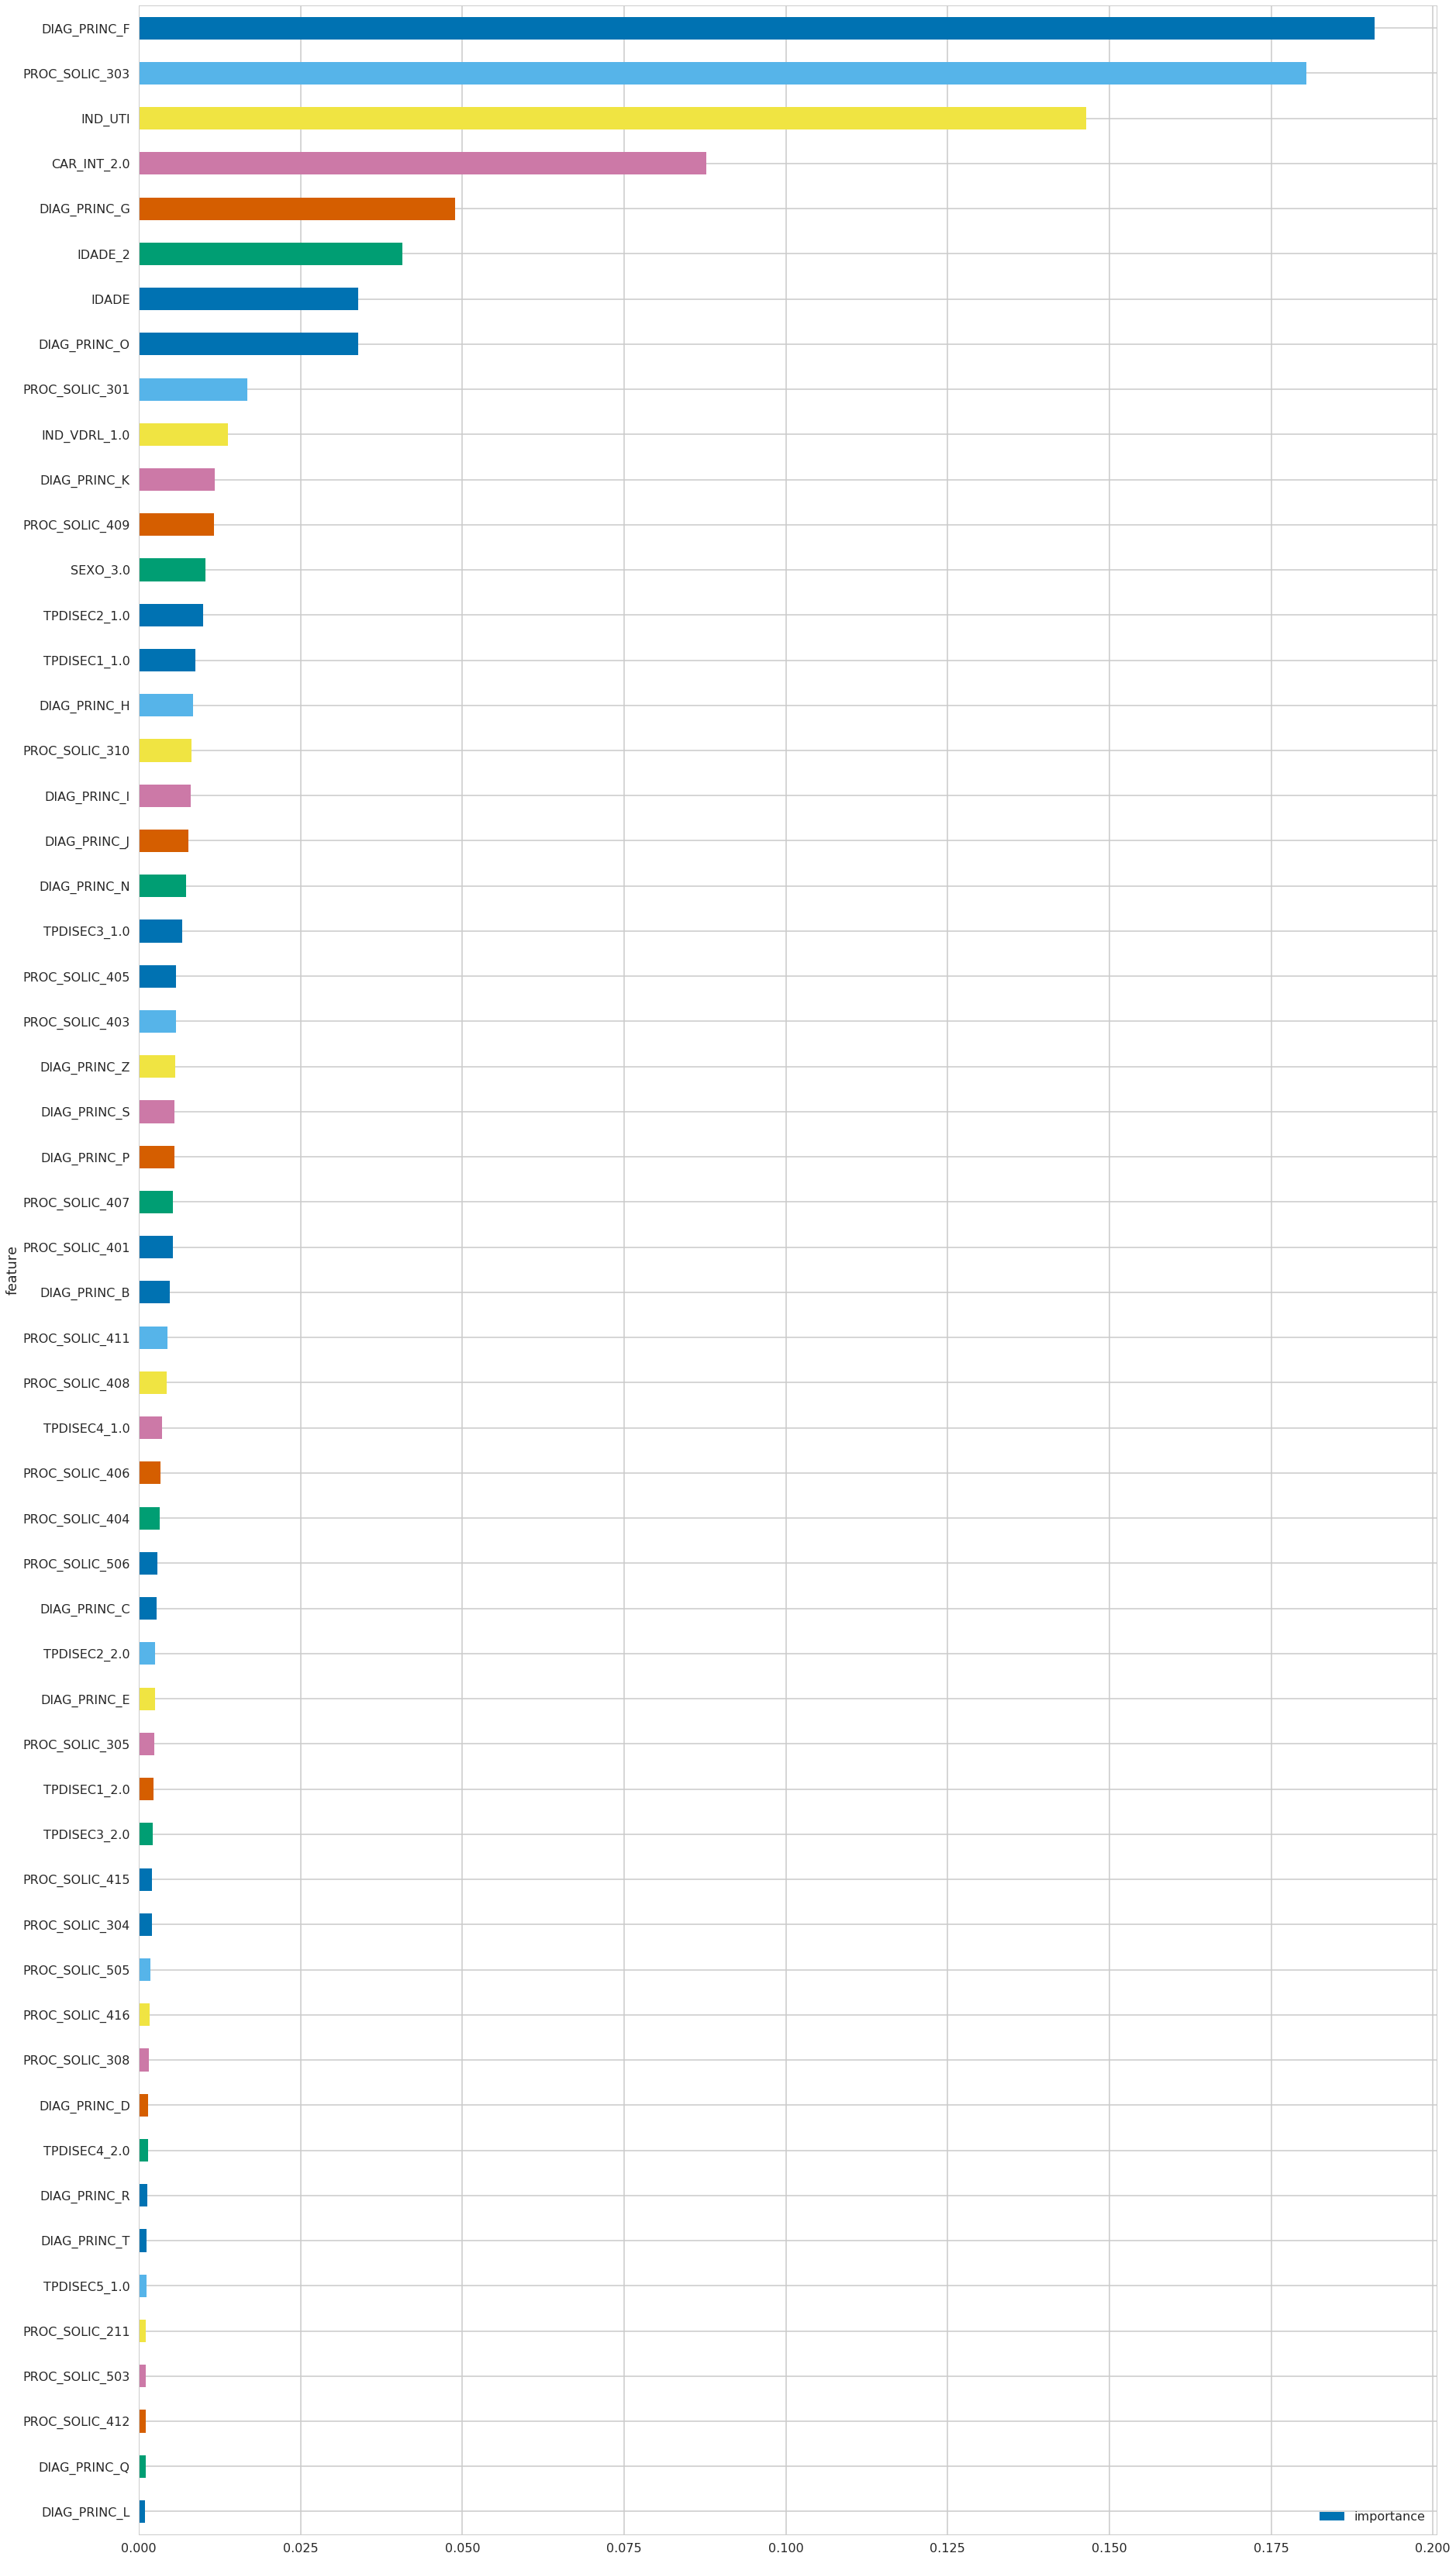

In [24]:
featfilter = featimportance[featimportance['importance']>0.001]
print(featfilter)

featfilter.plot(x='feature',y='importance',kind='barh')
plt.show()

In [25]:
featimportance.to_csv('Random_Forest_selection.csv')

In [26]:
joblib.dump(rfmodel, 'rfmodel.pkl')
#lrmodel = joblib.load('lrmodel.pkl')

['rfmodel.pkl']

In [18]:
rfmodel = joblib.load('rfmodel.pkl')

In [27]:
y_train_pred = rfmodel.predict(X_train)
y_test_pred = rfmodel.predict(X_test)
Y_train = np.reshape(Y_train,(len(Y_train),))
Y_test = np.reshape(Y_test,(len(Y_test),))

from sklearn.metrics import r2_score,mean_squared_error,median_absolute_error

print(str(r2_score(Y_train,y_train_pred)),' é o R2 do training set')
print(str(r2_score(Y_test,y_test_pred)), ' é o R2 do test set')

print(str(mean_squared_error(Y_train,y_train_pred)),' é o MSE do training set')
print(str(mean_squared_error(Y_test,y_test_pred)), ' é o MSE do test set')

print(str(median_absolute_error(Y_train,y_train_pred)),' é o MAE do training set')
print(str(median_absolute_error(Y_test,y_test_pred)), ' é o MAE do test set')

/home/wilson_tayar/anaconda3/envs/tera-fev2018/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


0.347150049898  é o R2 do training set
0.341866711331  é o R2 do test set
44.8787477786  é o MSE do training set
45.3015786825  é o MSE do test set
2.21487426701  é o MAE do training set
2.21383489971  é o MAE do test set


# Gradient Boosting


In [12]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

/home/wilson_tayar/anaconda3/envs/tera-fev2018/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [13]:
gbm = xgb.XGBRegressor(n_estimators=45, max_depth=7, colsample_bytree=0.7)
gbm.fit(X_train,Y_train)


XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.7,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=7,
       min_child_weight=1, missing=None, n_estimators=45, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [34]:
xgb.plot_tree(gbm, num_trees=2)
fig = plt.gcf()
fig.set_size_inches(200, 100)
#fig.savefig('xgb_tree.png')
plt.show()

ExecutableNotFound: failed to execute ['dot', '-Tpng'], make sure the Graphviz executables are on your systems' PATH

In [14]:
y_train_pred = gbm.predict(X_train)
y_test_pred = gbm.predict(X_test)
Y_train = np.reshape(Y_train,(len(Y_train),))
Y_test = np.reshape(Y_test,(len(Y_test),))

from sklearn.metrics import r2_score,mean_squared_error,median_absolute_error,mean_absolute_error

print(str(r2_score(Y_train,y_train_pred)),' é o R2 do training set')
print(str(r2_score(Y_test,y_test_pred)), ' é o R2 do test set')

print(str(mean_squared_error(Y_train,y_train_pred)),' é o MSE do training set')
print(str(mean_squared_error(Y_test,y_test_pred)), ' é o MSE do test set')

print(str(mean_absolute_error(Y_train,y_train_pred)),' é o MAE do training set')
print(str(mean_absolute_error(Y_test,y_test_pred)), ' é o MAE do test set')

print(str(median_absolute_error(Y_train,y_train_pred)),' é o MAE do training set')
print(str(median_absolute_error(Y_test,y_test_pred)), ' é o MAE do test set')

/home/wilson_tayar/anaconda3/envs/tera-fev2018/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


0.372585078605  é o R2 do training set
0.367014111057  é o R2 do test set
43.130272133  é o MSE do training set
43.5705966353  é o MSE do test set
1.84401482344  é o MAE do training set
1.84664666653  é o MAE do test set
1.84401482344  é o MAE do training set
1.84664666653  é o MAE do test set


In [25]:
print(str(r2_score(Y_train,y_train_pred)),' é o R2 do training set')
print(str(r2_score(Y_test,y_test_pred)), ' é o R2 do test set')

print(str(mean_squared_error(Y_train,y_train_pred)),' é o MSE do training set')
print(str(mean_squared_error(Y_test,y_test_pred)), ' é o MSE do test set')

print(str(mean_absolute_error(Y_train,y_train_pred)),' é o MAE do training set')
print(str(mean_absolute_error(Y_test,y_test_pred)), ' é o MAE do test set')

print(str(median_absolute_error(Y_train,y_train_pred)),' é o MedAE do training set')
print(str(median_absolute_error(Y_test,y_test_pred)), ' é o MedAE do test set')

0.372585078605  é o R2 do training set
0.367014111057  é o R2 do test set
43.130272133  é o MSE do training set
43.5705966353  é o MSE do test set
3.49642313147  é o MAE do training set
3.49933759874  é o MAE do test set
1.84401482344  é o MedAE do training set
1.84664666653  é o MedAE do test set


In [20]:
#np.random.seed(32)
ix = np.random.choice(X_test.loc[(Y_test > 1)].index,50)
xhist = X_test.loc[ix]
yhist = Y_test.loc[ix]
predxgb = gbm.predict(xhist)
predrf = rfmodel.predict(xhist)
xhist["DIAS_PERM_VERDADEIRO"] = yhist
xhist["DIAS_PERM_XGB"] = np.round(predxgb)
xhist["DIAS_PERM_RF"] = np.round(predrf)
#xhist["ERRO"].describe()
xhist.to_csv('datastory.csv')

In [26]:
gbm.booster().get_score(importance_type='weight')

{'IND_UTI': 107,
 'DIAG_PRINC_G': 39,
 'DIAG_PRINC_O': 39,
 'PROC_SOLIC_409': 24,
 'PROC_SOLIC_301': 133,
 'PROC_SOLIC_407': 17,
 'DIAG_PRINC_H': 27,
 'CAR_INT_2.0': 248,
 'DIAG_PRINC_J': 60,
 'DIAG_PRINC_I': 50,
 'TPDISEC1_1.0': 300,
 'DIAG_PRINC_Z': 36,
 'DIAG_PRINC_N': 39,
 'SEXO_3.0': 251,
 'TPDISEC2_1.0': 225,
 'DIAG_PRINC_S': 46,
 'TPDISEC1_2.0': 195,
 'TPDISEC2_2.0': 127,
 'PROC_SOLIC_411': 10,
 'IND_VDRL_1.0': 34,
 'PROC_SOLIC_403': 58,
 'PROC_SOLIC_211': 10,
 'PROC_SOLIC_415': 47,
 'TPDISEC4_1.0': 91,
 'DIAG_PRINC_C': 30,
 'PROC_SOLIC_408': 30,
 'PROC_SOLIC_416': 6,
 'CAR_INT_6.0': 19,
 'TPDISEC4_2.0': 61,
 'DIAG_PRINC_Q': 35,
 'PROC_SOLIC_406': 65,
 'PROC_SOLIC_412': 27,
 'TPDISEC5_1.0': 42,
 'TPDISEC6_2.0': 34,
 'DIAG_PRINC_F': 28,
 'PROC_SOLIC_303': 153,
 'PROC_SOLIC_506': 54,
 'CAR_INT_5.0': 16,
 'PROC_SOLIC_304': 38,
 'PROC_SOLIC_405': 8,
 'TPDISEC3_2.0': 95,
 'DIAG_PRINC_K': 61,
 'DIAG_PRINC_R': 48,
 'IDADE': 1590,
 'PROC_SOLIC_503': 30,
 'DIAG_PRINC_M': 17,
 'PROC_SOLIC

In [23]:
imps = pd.DataFrame({'importance': gbm.feature_importances_, 'feature': X_train.columns}).sort_values('importance', ascending = False)[:15]
imps.plot(x='feature', y='importance', kind='barh')
plt.show()

AttributeError: 'XGBRegressor' object has no attribute 'feature_importances_'

In [33]:
joblib.dump(gbm, 'gbm.pkl')
#lrmodel = joblib.load('lrmodel.pkl')

['gbm.pkl']

In [38]:
# Create the parameter grid: gbm_param_grid
gbm_param_grid = {
   'n_estimators': [25,35,45],
   'colsample_bytree': [0.3, 0.7],
   'max_depth': range(3, 10)
}

# Instantiate the regressor: gbm
gbm = xgb.XGBRegressor(n_estimators=10)

# Perform random search: grid_mse
randomized_mse = RandomizedSearchCV(param_distributions=gbm_param_grid, estimator=gbm, scoring="neg_mean_squared_error", n_iter=5, cv=4, verbose=1)

# Fit randomized_mse to the data
randomized_mse.fit(X_train,Y_train)

# Print the best parameters and lowest RMSE
print("Best parameters found: ", randomized_mse.best_params_)
print("Lowest RMSE found: ", np.sqrt(np.abs(randomized_mse.best_score_)))

Fitting 4 folds for each of 5 candidates, totalling 20 fits


KeyboardInterrupt: 

# scaling variables

In [ ]:
#USAR SCALED VARIABLES NO MODELO FINAL

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [ ]:
datascaler = MinMaxScaler()
datascaler.fit(datatrain)
datascaled = datascaler.transform(datatrain)

In [ ]:
targettrain = pd.DataFrame(targettrain)
targettrain.shape

In [ ]:
targetscaler = MinMaxScaler()
targetscaler.fit(targettrain)

In [ ]:
targetscaled = targetscaler.transform(targettrain)
DIAGFscaled = targetscaler.transform(pd.DataFrame(datatrain['DIAG_PRINC_F']))

In [ ]:
targetscaled = np.reshape(targetscaled,(len(targetscaled),))
targetscaled.shape

# boost

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
dtmodel = DecisionTreeRegressor(criterion='mse',max_depth=5)
dtmodel.fit(datatrain, targettrain)

In [ ]:
featimportance = pd.DataFrame({'importance': dtmodel.feature_importances_, 'feature': data.columns}).sort_values('importance', ascending = False)[:15]
featimportance.plot(x='feature', y='importance', kind='barh')
plt.figure(figsize=(20,10))
plt.show()

In [ ]:
targetpred = dtmodel.predict(datatest)

print ("R^2 train:", dtmodel.score(datatrain, targettrain))
print ("R^2 test:", dtmodel.score(datatest, targettest))
print ("R^2 pred:", dtmodel.score(datatest, targetpred))

In [ ]:
rfmodel = RandomForestRegressor(n_estimators=100, max_features=7, max_depth=20, min_samples_split=500)
rfmodel.fit(datatrain, targettrain)
targetpred = rfmodel.predict(datatest)

print ("R^2 train:", rfmodel.score(datatrain, targettrain))
print ("R^2 test:", rfmodel.score(datatest, targettest))
print ("R^2 pred:", rfmodel.score(datatest, targetpred))

In [ ]:
featimportance = pd.DataFrame({'importance': rfmodel.feature_importances_, 'feature': data.columns}).sort_values('importance', ascending = False)[:18]
featimportance.plot(x='feature', y='importance', kind='barh')
plt.figure(figsize=(40,20))
plt.show()

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
# Create the parameter grid: gbm_param_grid
gbm_param_grid = {'n_estimators': [25],'max_depth': range(2, 12)}

# Instantiate the regressor: gbm
bmodel = xgb.XGBRegressor(n_estimators=10)

# Perform random search: grid_mse
randomized_mse = RandomizedSearchCV(param_distributions=gbm_param_grid, estimator=bmodel, scoring="neg_mean_squared_error", n_iter=5, cv=4, verbose=1)

# Fit randomized_mse to the data
randomized_mse.fit(datatrain,targettrain)

# Print the best parameters and lowest RMSE
print("Best parameters found: ", randomized_mse.best_params_)
print("Lowest RMSE found: ", np.sqrt(np.abs(randomized_mse.best_score_)))

In [ ]:
bmodel = xgb.XGBRegressor(n_estimators=25, max_depth=8)
bmodel.fit(datatrain,targettrain)
targetpred = bmodel.predict(datatest)

print ("R^2 train:", bmodel.score(datatrain, targettrain))
print ("R^2 test:", bmodel.score(datatest, targettest))
print ("R^2 pred:", bmodel.score(datatest, targetpred))

In [ ]:
#FALTOU IMPORTAR ALGUMA COISA...

In [ ]:
xgb.plot_tree(bmodel, num_trees=2)
fig = plt.gcf()
fig.set_size_inches(200, 100)

In [ ]:
xgb.to_graphviz(bmodel, num_trees=2)

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
datascaled = StandardScaler().fit_transform(data)
pca = PCA()
datapca = pca.fit_transform(datascaled)

In [ ]:
plt.figure(figsize=(30,15))
features = range(pca.n_components_)

plt.bar(features, pca.explained_variance_ratio_)
plt.xticks(features)
plt.xlabel('Componentes principais')
plt.ylabel('Variância')
plt.show()

print('Variância explicada: ')
cum_exp_var = np.cumsum(pca.explained_variance_ratio_)

print('-'*50)
for i in range(len(pca.explained_variance_ratio_)):
    print('{} Componente(s) principal(is): {:.2%}'.format(i+1, cum_exp_var[i]))

# kmeans

In [ ]:
k = range(1,10,1)

# Lista de inércias
inertias = []

# Para cada valor de k, ache a inércia
for i in k:
    # crie a instância
    kmeans = KMeans(n_clusters=i)

    # Treine o modelo
    model = kmeans.fit(scaledd)

    # Ache a inercia dos clusters
    inertias.append(model.inertia_)
    
plt.plot(k, inertias, '-ob')
plt.xlabel('Clusters')
plt.ylabel('Inertia')
plt.grid()
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=3)
# Treine o modelo
kmeans.fit(datascaled)

datatrainCluster = pd.DataFrame(datascaled,columns=datatrain.columns)
datatrainCluster["cluster"] = kmeans.predict(datascaled)

In [ ]:
datatrainCluster.columns

In [ ]:
sns.swarmplot(data=datatrainCluster,x=datatrainCluster["VAL_TOT"],y=targetscaled,hue=datatrainCluster["cluster"])
plt.show()